# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Last Dataset Check/Additions

In [3]:
model = pd.read_csv('../data/combined_score.csv')

In [4]:
model.head()

,title,created_utc,score,subreddit,words
0,TIL Kidney failure means the kidney is unable to filter out waste normally and does not mean the kidney starts becoming necrotic.,1635826276,14,todayilearned,22
1,"TIL on 1978, Egyptian Special Forces raided Larnaca Airport (Cyprus) without authorisation from Cyprus government in an attempt to intervene in a hijacking, leading to exchange of heavy gunfire with Cyprus' army and the death of 17 Egyptian commandos",1614092825,121,todayilearned,39
2,"TIL a PhD student was invited to submit a manuscript to a dubious academic journal, so as a joke he wrote a fake paper extolling the educational value of making meth which loosely followed the plot of Breaking Bad, with Walter White and Jessie Pinkman as"" co-authors"". They actually published it.",1610759830,10,todayilearned,51
3,TIL every New Year's Day from 1801 to 1932 (except during Wilson's presidency) a White House reception was held in which the public lined up to shake the president's hand. The line was often several blocks long and the president was expected to shake hands with everyone.,1612388676,159,todayilearned,47
4,"TIL that Norman Lear, creator of ""All in the Family"", originally created Archie Bunker to be disliked by audiences. He was shocked when he became a beloved character by middle America.",1614802190,230,todayilearned,31


In [5]:
model.isnull().sum()

title          0
created_utc    0
score          0
subreddit      0
words          0
dtype: int64

All looks clean

### Binarizing the Subreddit Column

In [6]:
model.subreddit = model.subreddit.str.replace('todayilearned','1')
model.subreddit = model.subreddit.str.replace('ShittyTodayILearned','0')

model['subreddit'] = model['subreddit'].astype(int)

### Creating Stopwords List

In [7]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(('til', 'todayilearned', 'til:', 'stil', 'shittytodayilearned', 'today', 'learned'))

These words might artificially increase accuracy, which I do not want

# Simple Models

I will run all models and save comments until I see all. I am looking for models that have a higher accuracy than average.

In [8]:
X = model['title']
y = model['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X , y, random_state = 42)

This will be used in all models

## CV Logistic Regression

In [9]:
pipe = Pipeline([
    ('cv', CountVectorizer(stop_words = stopwords, ngram_range = (1, 2))),
    ('lr', LogisticRegressionCV())
    ])

pipe.fit(X_train, y_train)
print(f'Training Accuracy: {pipe.score(X_train, y_train)}')
print(f'Testing Accuracy: {pipe.score(X_test, y_test)}')

Training Accuracy: 1.0
Testing Accuracy: 0.7660581473968898


Specificity: 0.876750700280112
Type I Error: 0.12324929971988796


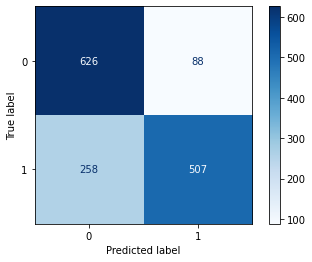

In [10]:
preds = pipe.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format='d');
print(f'Specificity: {(tn) / (tn + fp)}')
print(f'Type I Error: {(1 - (tn) / (tn + fp))}')

## CV Decision Trees

In [11]:
pipe = Pipeline([
    ('cv', CountVectorizer(stop_words = stopwords, ngram_range = (1, 2))),
    ('dt', DecisionTreeClassifier())
    ])

pipe.fit(X_train, y_train)
print(f'Training Accuracy: {pipe.score(X_train, y_train)}')
print(f'Testing Accuracy: {pipe.score(X_test, y_test)}')

Training Accuracy: 1.0
Testing Accuracy: 0.6883029073698445


Specificity: 0.711484593837535
Type I Error: 0.28851540616246496


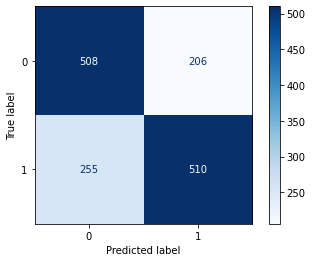

In [12]:
preds = pipe.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format='d');
print(f'Specificity: {(tn) / (tn + fp)}')
print(f'Type I Error: {(1 - (tn) / (tn + fp))}')

## CV Gradient Boost

In [13]:
pipe = Pipeline([
    ('cv', CountVectorizer(stop_words = stopwords, ngram_range = (1, 2))),
    ('gb', GradientBoostingClassifier())
    ])

pipe.fit(X_train, y_train)
print(f'Training Accuracy: {pipe.score(X_train, y_train)}')
print(f'Testing Accuracy: {pipe.score(X_test, y_test)}')

Training Accuracy: 0.7757493802118549
Testing Accuracy: 0.6910074374577417


Specificity: 0.8207282913165266
Type I Error: 0.17927170868347342


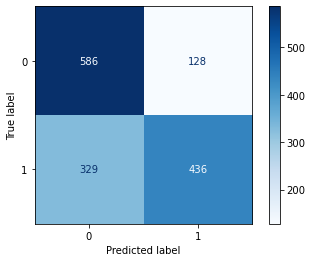

In [14]:
preds = pipe.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format='d');
print(f'Specificity: {(tn) / (tn + fp)}')
print(f'Type I Error: {(1 - (tn) / (tn + fp))}')

## CV ADA Boost

In [15]:
pipe = Pipeline([
    ('cv', CountVectorizer(stop_words = stopwords, ngram_range = (1, 2))),
    ('abc', AdaBoostClassifier())
    ])

pipe.fit(X_train, y_train)
print(f'Training Accuracy: {pipe.score(X_train, y_train)}')
print(f'Testing Accuracy: {pipe.score(X_test, y_test)}')

Training Accuracy: 0.7302231237322515
Testing Accuracy: 0.6741041244083841


Specificity: 0.7843137254901961
Type I Error: 0.21568627450980393


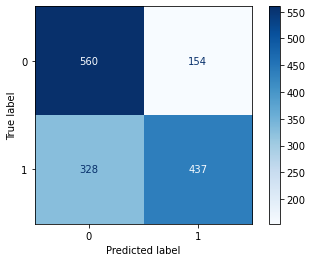

In [16]:
preds = pipe.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format='d');
print(f'Specificity: {(tn) / (tn + fp)}')
print(f'Type I Error: {(1 - (tn) / (tn + fp))}')

## CV Bagging

In [17]:
pipe = Pipeline([
    ('cv', CountVectorizer(stop_words = stopwords, ngram_range = (1, 2))),
    ('bc', BaggingClassifier())
    ])

pipe.fit(X_train, y_train)
print(f'Training Accuracy: {pipe.score(X_train, y_train)}')
print(f'Testing Accuracy: {pipe.score(X_test, y_test)}')

Training Accuracy: 0.9785891368041469
Testing Accuracy: 0.7200811359026369


Specificity: 0.7661064425770309
Type I Error: 0.23389355742296913


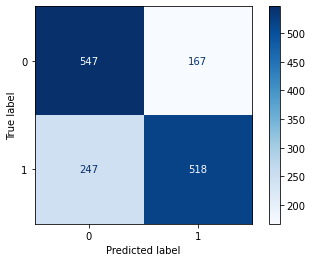

In [18]:
preds = pipe.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format='d');
print(f'Specificity: {(tn) / (tn + fp)}')
print(f'Type I Error: {(1 - (tn) / (tn + fp))}')

## TFID Logistic Regression

In [19]:
pipe = Pipeline([
    ('tf', TfidfVectorizer(stop_words = stopwords)),
    ('lr', LogisticRegressionCV(solver = 'liblinear'))
    ])

pipe.fit(X_train, y_train)
print(f'Training Accuracy: {pipe.score(X_train, y_train)}')
print(f'Testing Accuracy: {pipe.score(X_test, y_test)}')

Training Accuracy: 0.9808429118773946
Testing Accuracy: 0.7606490872210954


Specificity: 0.742296918767507
Type I Error: 0.25770308123249297


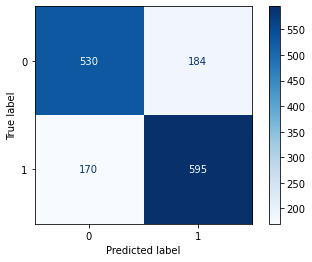

In [20]:
preds = pipe.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format='d');
print(f'Specificity: {(tn) / (tn + fp)}')
print(f'Type I Error: {(1 - (tn) / (tn + fp))}')

## TFID Decision Trees

In [21]:
pipe = Pipeline([
    ('tf', TfidfVectorizer(stop_words = stopwords)),
    ('dt', DecisionTreeClassifier())
    ])

pipe.fit(X_train, y_train)
print(f'Training Accuracy: {pipe.score(X_train, y_train)}')
print(f'Testing Accuracy: {pipe.score(X_test, y_test)}')

Training Accuracy: 1.0
Testing Accuracy: 0.7106152805949966


Specificity: 0.8207282913165266
Type I Error: 0.17927170868347342


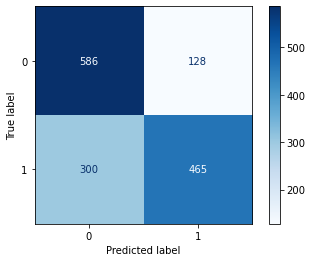

In [22]:
preds = pipe.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format='d');
print(f'Specificity: {(tn) / (tn + fp)}')
print(f'Type I Error: {(1 - (tn) / (tn + fp))}')

## TFID Random Forest

In [23]:
pipe_rf1 = Pipeline([
    ('tf', TfidfVectorizer(stop_words = stopwords)),
    ('rf', RandomForestClassifier())
    ])

pipe.fit(X_train, y_train)
print(f'Training Accuracy: {pipe.score(X_train, y_train)}')
print(f'Testing Accuracy: {pipe.score(X_test, y_test)}')

Training Accuracy: 1.0
Testing Accuracy: 0.7052062204192021


Specificity: 0.819327731092437
Type I Error: 0.18067226890756305


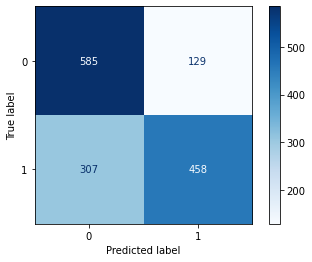

In [24]:
preds = pipe.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format='d');
print(f'Specificity: {(tn) / (tn + fp)}')
print(f'Type I Error: {(1 - (tn) / (tn + fp))}')

## TFID Extra Trees

In [25]:
pipe = Pipeline([
    ('tf', TfidfVectorizer(stop_words = stopwords)),
    ('et', ExtraTreesClassifier())
    ])

pipe.fit(X_train, y_train)
print(f'Training Accuracy: {pipe.score(X_train, y_train)}')
print(f'Testing Accuracy: {pipe.score(X_test, y_test)}')

Training Accuracy: 1.0
Testing Accuracy: 0.7457741717376606


Specificity: 0.8781512605042017
Type I Error: 0.12184873949579833
Precision: 0.8454706927175843
Recall: 0.6222222222222222


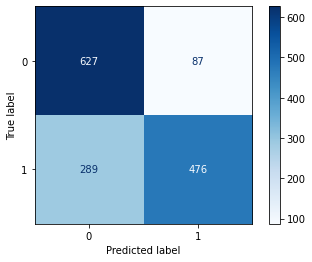

In [26]:
preds = pipe.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format='d');
print(f'Specificity: {(tn) / (tn + fp)}')
print(f'Type I Error: {(1 - (tn) / (tn + fp))}')
print(f'Precision: {(tp) / (tp + fp)}')
print(f'Recall: {(tp) / (tp + fn)}')
plt.savefig('../images/tfet_matrix.png')

## TFID Gradient Boost

In [27]:
pipe = Pipeline([
    ('tf', TfidfVectorizer(stop_words = stopwords)),
    ('gb', GradientBoostingClassifier())
    ])

pipe.fit(X_train, y_train)
print(f'Training Accuracy: {pipe.score(X_train, y_train)}')
print(f'Testing Accuracy: {pipe.score(X_test, y_test)}')

Training Accuracy: 0.8005409060175794
Testing Accuracy: 0.7139959432048681


Specificity: 0.8683473389355743
Type I Error: 0.13165266106442575


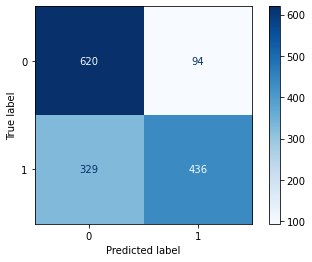

In [28]:
preds = pipe.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format='d');
print(f'Specificity: {(tn) / (tn + fp)}')
print(f'Type I Error: {(1 - (tn) / (tn + fp))}')

## TFID ADA Boost

In [29]:
pipe = Pipeline([
    ('tf', TfidfVectorizer(stop_words = stopwords)),
    ('abc', AdaBoostClassifier())
    ])

pipe.fit(X_train, y_train)
print(f'Training Accuracy: {pipe.score(X_train, y_train)}')
print(f'Testing Accuracy: {pipe.score(X_test, y_test)}')

Training Accuracy: 0.7257155735857561
Testing Accuracy: 0.6605814739688979


Specificity: 0.8543417366946778
Type I Error: 0.14565826330532217


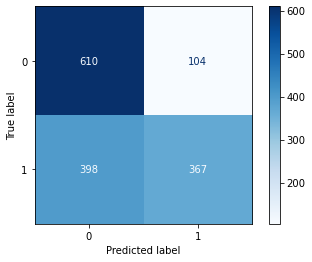

In [30]:
preds = pipe.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format='d');
print(f'Specificity: {(tn) / (tn + fp)}')
print(f'Type I Error: {(1 - (tn) / (tn + fp))}')

## TF Bagging

In [31]:
pipe = Pipeline([
    ('tf', TfidfVectorizer(stop_words = stopwords)),
    ('bc', BaggingClassifier())
    ])

pipe.fit(X_train, y_train)
print(f'Training Accuracy: {pipe.score(X_train, y_train)}')
print(f'Testing Accuracy: {pipe.score(X_test, y_test)}')

Training Accuracy: 0.9821951769213433
Testing Accuracy: 0.7302231237322515


Specificity: 0.8669467787114846
Type I Error: 0.13305322128851538


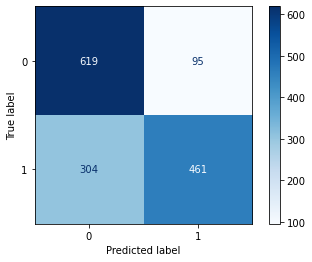

In [32]:
preds = pipe.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
plot_confusion_matrix(pipe, X_test, y_test, cmap='Blues', values_format='d');
print(f'Specificity: {(tn) / (tn + fp)}')
print(f'Type I Error: {(1 - (tn) / (tn + fp))}')

Again, most classifiers fall into a testing accuracy of 70%. Similarly, the same 3 models stand above the rest: CV Logistic Regression, TFID Logistic Regression, and TFID Extra Trees.

# GridSearches

I will run all models and save comments until I see all. I am looking for models that have a higher accuracy than average.

In [33]:
pipe = Pipeline([
    ('cv', CountVectorizer(stop_words = stopwords)),
    ('lr', LogisticRegressionCV(solver = 'liblinear'))
    ])

params = { 
    'cv__max_features': [None, 100, 1000, 5000, 10000, 25000],
    'cv__min_df': [1, 2, 3],
    'lr__Cs': [[.1],[1],[5],[10]],
    'lr__penalty': ['l1', 'l2'],
    'lr__max_iter': [1, 100, 250]
    }

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

pipe_cvlr = GridSearchCV(pipe,
                         params,
                         cv = 5,
                         verbose = 1,
                         n_jobs= -1 )

pipe_cvlr.fit(X_train, y_train)

print(pipe_cvlr.best_params_)
print(f'Training Accuracy: {pipe_cvlr.score(X_train, y_train)}')
print(f'Testing Accuracy: {pipe_cvlr.score(X_test, y_test)}')
print(f'Cross Val: {pipe_cvlr.best_score_}')

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
{'cv__max_features': None, 'cv__min_df': 2, 'lr__Cs': [1], 'lr__max_iter': 100, 'lr__penalty': 'l2'}
Training Accuracy: 0.9846743295019157
Testing Accuracy: 0.77079107505071
Cross Val: 0.7924243578414943


In [34]:
pipe = Pipeline([
    ('tf', TfidfVectorizer(stop_words = stopwords)),
    ('lr', LogisticRegressionCV(solver = 'liblinear'))
    ])

params = {
    'tf__max_features': [None, 5000, 10000, 25000],
    'tf__min_df': [1, 2, 3],
    'lr__Cs': [[.1],[1],[5],[10]],
    'lr__penalty': ['l1', 'l2'],
    'lr__max_iter': [1, 100, 250]
    }

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

pipe_tflr = GridSearchCV(pipe,
                         params,
                         cv = 5,
                         verbose = 1,
                         n_jobs= -1 )

pipe_tflr.fit(X_train, y_train)

print(pipe_tflr.best_params_)
print(f'Training Accuracy: {pipe_tflr.score(X_train, y_train)}')
print(f'Testing Accuracy: {pipe_tflr.score(X_test, y_test)}')
print(f'Cross Val: {pipe_tflr.best_score_}')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
{'lr__Cs': [1], 'lr__max_iter': 100, 'lr__penalty': 'l2', 'tf__max_features': None, 'tf__min_df': 3}
Training Accuracy: 0.9188640973630832
Testing Accuracy: 0.7626774847870182
Cross Val: 0.774852219750754


In [35]:
pipe = Pipeline([
    ('tf', TfidfVectorizer(stop_words = stopwords)),
    ('et', ExtraTreesClassifier())
    ])

params = {
    'tf__max_features': [None, 5000, 10000, 25000],
    'tf__min_df': [1, 2, 3],
    'et__max_depth': [None, 1, 2, 3, 4, 5],
    'et__min_samples_split': [2, 10, 25],
    'et__min_samples_leaf': [1, 5, 10]
    }

pipe.fit(X_train, y_train)
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

pipe_tfet = GridSearchCV(pipe,
                         params,
                         cv = 5,
                         verbose = 1,
                         n_jobs= -1 )

pipe_tfet.fit(X_train, y_train)

print(pipe_tfet.best_params_)
print(f'Training Accuracy: {pipe_tfet.score(X_train, y_train)}')
print(f'Testing Accuracy: {pipe_tfet.score(X_test, y_test)}')
print(f'Cross Val: {pipe_tfet.best_score_}')

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
{'et__max_depth': None, 'et__min_samples_leaf': 1, 'et__min_samples_split': 10, 'tf__max_features': 25000, 'tf__min_df': 1}
Training Accuracy: 0.9995492449853505
Testing Accuracy: 0.7822853279242732
Cross Val: 0.7937757091928456


These GridSearches lead to much better fitting models compared to Method One. Additionally, all testing accuracy increased as well. These models are close one again, but looking to specificity as a tiebreaker, the best model is:
**TFID Extra Trees**

# Returning String Values of TP, TN, FP, FN

I want to give examples of posts where my best model succeeded and where it failed

In [36]:
# inspired from: https://stackoverflow.com/questions/51878608/how-to-view-the-rows-marked-as-false-positive-and-false-negative-from-confusion/51879001

y_pred_class = pipe_tfet.predict(X_test)
false_positives = np.logical_and(y_test != y_pred_class, y_pred_class == 1)

X_test[false_positives]

3240                                                                                                                                                                               TIL that Pegi 12 is not the studio that makes all my favorite games from the UK, but a rating system for European videogames
3370                                                                                                                       TIL stunning trout for 60 seconds in an electric field of 250 V/m r.m.s. with a sinusoidal waveform of 1,000 Hz renders them permanently unconscious without degrading meat quality.
5459                                                                                                                                                                                                                    TIL The "Blue screen of death" is not the same as " the light at the end of the tunnel"
4094                                                                                    

In [37]:
true_positives = np.logical_and(y_test == y_pred_class, y_pred_class == 1)

X_test[true_positives]

705                                                                                                                                                                                                                                         TIL Tony Hart, star of children's art shows on British TV, served as a Gurkha in WW2
2954                                                                                                                                                                                                                TIL in 2008 a woman from Ireland died from an allergic reaction to canine semen after having sex with a dog.
296                                                                                                                                                                                        TIL in 1963 GM was Selling So Many Cars, They Stopped Going to Races to Reduce Sales in Fearfulness of Being Broken up over Antitrust
2940                                 